# Data Input/Output (IO)

This utility describes how to import data from .csv, inspect it, modify it, and save a new data file. 

1. Import libraries
2. Load a .csv file as a dataframe
3. Use various Pandas methods and attributes to inspect the data
4. Make some basic plots using specified columns
5. Save a new .csv file as output

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the .csv file and convert to a dataframe
file_path = "DG_Sim_Data.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()

,age,height,gender,is_active,signup_date
0,37.0,NaN,female,False,2020-04-27
1,35.0,180.86,female,False,NaN
2,63.0,176.80,male,True,2021-01-29
3,64.0,191.69,other,True,2023-01-17
4,27.0,161.93,female,True,2016-02-03


In [6]:
# Provide descriptive stat summary
df.describe()

,age,height
count,190.000000,190.000000
mean,41.136842,170.544789
std,13.336992,10.005565
min,18.000000,146.850000
25%,30.250000,163.915000
50%,40.000000,169.985000
75%,52.000000,177.070000
max,64.000000,199.090000


## What's going on here?

Why does df.head() do that? head() is a function that does the operation of displaying the first five rows. It is written somewhere in the Pandas source code and can be accessed by calling it. There are many methods like that for doing useful things...

In [7]:
# View the last five rows
df.tail()

,age,height,gender,is_active,signup_date
195,40.0,168.79,other,True,2024-07-23
196,56.0,151.93,other,False,2016-11-05
197,62.0,NaN,female,False,2018-07-05
198,60.0,185.02,male,False,2024-10-27
199,23.0,166.29,male,True,2018-01-17


In [16]:
# Remove all the rows with NaN values
''' Note that this approach creates a new dataframe called df_clean to store the data. This is good practice because you're modifiying the original dataframe.'''
df_clean= df.dropna()
df_clean.head()

,age,height,gender,is_active,signup_date
2,63.0,176.80,male,True,2021-01-29
3,64.0,191.69,other,True,2023-01-17
4,27.0,161.93,female,True,2016-02-03
5,43.0,176.31,female,False,2017-11-10
6,54.0,176.78,other,True,2025-04-24


In [12]:
# Look at the 'shape' of the data
df.shape

(200, 5)

## What's going on here?

shape is different from a method, that's why it doesn't have the (). shape is an attribute. Something that Pandas has already calculated for the data. You can look at it, and sometimes that's useful...

In [14]:
# This one shows the data types in the columns
df.dtypes

age            float64
height         float64
gender          object
is_active       object
signup_date     object
dtype: object

In [19]:
# split off just one column as a separate array
age_array= df['age']
age_array.head()

0    37.0
1    35.0
2    63.0
3    64.0
4    27.0
Name: age, dtype: float64

In [24]:
# Do this for more than one column
age_height_df= df[['age', 'height']] # note the double brackets
age_height_df.head()

,age,height
0,37.0,NaN
1,35.0,180.86
2,63.0,176.80
3,64.0,191.69
4,27.0,161.93


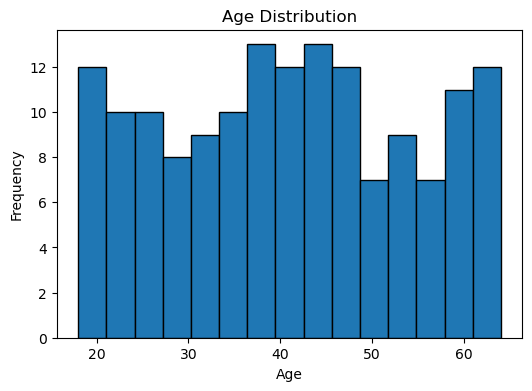

In [17]:
# Make a basic histogram plot
if 'age' in df_clean.columns: # check to make sure this column header is actually in the data before plotting
    plt.figure(figsize=(6, 4))
    plt.hist(df_clean['age'], bins=15, edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

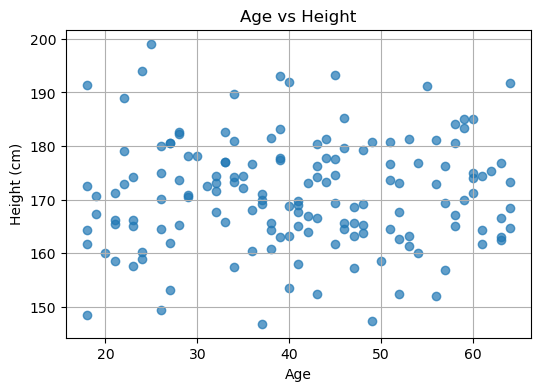

In [25]:
# Make a basic scatter plot between two columns
if 'age' in df_clean.columns and 'height' in df_clean.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_clean['age'], df_clean['height'], alpha=0.7) # lots of things to change; check the matplotlib docs
    plt.title('Age vs Height')
    plt.xlabel('Age')
    plt.ylabel('Height (cm)')
    plt.grid(True)
    plt.show() 

In [26]:
# write a dataframe out as a .csv file
df_clean.to_csv("DATAIO.csv", index= False)